In [1]:
import pandas as pd

In [263]:
mvlens=pd.read_csv("C:/Users/prasenjeet.s/Projects/Simpli_Projects/Projects for Submission/Project4_Movielens/movies.dat",delimiter="::",names=["MovieID","Name","Genre"])
users=pd.read_csv("C:/Users/prasenjeet.s/Projects/Simpli_Projects/Projects for Submission/Project4_Movielens/users.dat",delimiter="::",names=["UserID","Gender","Age","Occupation","Zip-Code"])
ratings=pd.read_csv("C:/Users/prasenjeet.s/Projects/Simpli_Projects/Projects for Submission/Project4_Movielens/ratings.dat",delimiter="::",names=["UserID","MovieID","Rating","Timestamp"])

c:\users\prasenjeet.s\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
mvlens.describe()

,1
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [142]:
mvlens.head(3)

,MovieID,Name,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [144]:
mvlens["Year"]=mvlens["Name"].str.extract('(\d+)')
mvlens["Movie Name"]=mvlens["Name"].str.split('\(').str.get(0)

c:\users\prasenjeet.s\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [342]:
list(mvlens["Name"]).split('\(')

AttributeError: 'list' object has no attribute 'split'

In [338]:
x.split('(')

['fffefg', 'fvsfdbg)ggbb', 'vvbs)']

In [ ]:
mvlens["Name"].str.split('\(')

In [369]:
re.findall('\d\d\d\d',"Toy Stor6666y (1995)")[-1]
# re.findall('\w',"Toy Stor6666y (1995)")

'1995'

In [309]:
mvlens["Year"].unique()

array(['1995', '7', '1994', '1996', '2', '1976', '1993', '1992', '1988',
       '13', '1967', '1964', '1977', '34', '42', '33', '1965', '8', '3',
       '1982', '1962', '1990', '1989', '1991', '1937', '1940', '1969',
       '45', '1981', '1973', '1970', '6', '301', '1960', '1955', '1956',
       '1959', '3000', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '4', '1974', '98', '1958',
       '1949', '1972', '1998', '1', '1933', '1952', '1951', '1957', '1961',
       '1954', '1934', '1944', '1942', '1941', '1953', '1939', '2001',
       '1947', '1945', '1938', '1935', '1936', '80', '1926', '39', '1932',
       '1930', '20', '1971', '37', '1979', '100', '1966', '1978', '1985',
       '12', '1983', '1984', '1931', '1922', '101', '1600', '187', '2000',
       '81', '66', '9', '1927', '1929', '5', '54', '1928', '1925', '1923',
       '1999', '9000', '2010', '24', '52', '200', '77', '79', '10', '1900',
       '400', '1919', '17', '1920', '1921',

In [315]:
mvlens[mvlens['Year']=='9000'] # Wrong data. To be corrected

,MovieID,Name,Genre,Year,Movie Name
2239,2308,Detroit 9000 (1973),Action|Crime,9000,Detroit 9000


In [322]:
mvlens["Year"]=mvlens.Name.str.split("(").str.get(1).str.replace(")","")

In [324]:
mvlens[mvlens['Year']=='7']

,MovieID,Name,Genre,Year,Movie Name


In [326]:
mvlens.Year.unique()

array(['1995', 'Yao a yao yao dao waipo qiao ', 'Se7en ', '1994',
       'The Postman ', 'Le Confessionnal ', '1996', 'Gazon maudit ',
       'Badkonake Sefid  ', 'Antonia ', 'Haine, La ', 'Keiner liebt mich ',
       '1976', '1993', '1992', "Uomo delle stelle, L' ", 'Saimt el Qusur ',
       'Cienie ', '1967', 'Parapluies de Cherbourg, Les ',
       'Utomlyonnye solntsem ', 'Pred dozhdot ', '1977',
       'Como agua para chocolate ', 'Mi vida loca ',
       'a.k.a. Leon: The Professional ', 'La Reine Margot ',
       'Pret-A-Porter ', 'Fresa y chocolate ', 'Huozhe ',
       'Die Macht der Bilder ', '1965', 'Ai no corrida ',
       'Nuits fauves, Les ', '1982', '1962', 'Bulletproof Heart ',
       'Kådisbellan  ', 'Io speriamo che me la cavo  ', 'Café au Lait ',
       'Caro Diario ', 'De eso no se habla ', '1990', '1991', '1989',
       '1937', '1940', '1969', 'Wu Kui ', '1981', 'Pane e cioccolata ',
       '1970', 'La Flor de Mi Secreto ', 'Schrei aus Stein ',
       'Tierra y libert

In [330]:
mvlens[mvlens["Year"]=="Ai no corrida "] # Still not fixed. Need to use regex

,MovieID,Name,Genre,Year,Movie Name
491,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,Ai no corrida,In the Realm of the Senses


In [528]:
t=[]
for x in range(len(mvlens)): t.append(mvlens.Name.str.split('(').tolist()[x][-1])
mvlens["Year"]=pd.Series(t).str.replace(")","")

In [529]:
mvlens["Year"].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [541]:
# mvlens[3000:3015].tail()
mvlens.loc[3011,:]

MovieID                                                    3080
Name          Goodbye, 20th Century (Zbogum na dvadesetiot v...
Genre                                              Drama|Sci-Fi
Year                                                       1998
Movie Name                               Goodbye, 20th Century 
Name: 3011, dtype: object

In [545]:
t=[]
for x in range(len(mvlens)): t.append(mvlens.Name.iloc[x].rsplit('(',1)[0])
mvlens["Movie Name"]=pd.Series(t)

In [548]:
# mvlens[3000:3015].tail()
mvlens.loc[3011,"Movie Name"]
#mvlens.loc[3011,"Name"]

'Goodbye, 20th Century (Zbogum na dvadesetiot vek) '

In [215]:
# mvlens.head(3)
ratings.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [154]:
users.head(3)

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [611]:
mvlens.head(8)

,MovieID,Name,Genre,Year,Movie Name
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II
5,6,Heat (1995),Action|Crime|Thriller,1995,Heat
6,7,Sabrina (1995),Comedy|Romance,1995,Sabrina
7,8,Tom and Huck (1995),Adventure|Children's,1995,Tom and Huck


In [163]:
import numpy as np
np.arange(1,21)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [164]:
occupation={0:"other" or not specified
,1:"academic/educator"
,2:"artist"
,3:"clerical/admin"
,4:"college/grad student"
,5:"customer service"
,6:"doctor/health care"
,7:"executive/managerial"
,8:"farmer"
,9:"homemaker"
, 10:"K-12 student"
, 11:"lawyer"
, 12:"programmer"
, 13:"retired"
, 14:"sales/marketing"
, 15:"scientist"
, 16:"self-employed"
, 17:"technician/engineer"
, 18:"tradesman/craftsman"
, 19:"unemployed"
, 20:"writer"}

In [169]:
# occupation[18]
occupation[users.loc[1,"Occupation"]]
# users.loc[1,"Occupation"]

'self-employed'

In [195]:
# occupation[pd.Series.tolist(users.loc[3:5,"Occupation"])]
# pd.Series.tolist(users.loc[3:5,"Occupation"])
[occupation[x] for x in pd.Series.tolist(users.loc[:,"Occupation"])]

['K-12 student',
 'self-employed',
 'scientist',
 'executive/managerial',
 'writer',
 'homemaker',
 'academic/educator',
 'programmer',
 'technician/engineer',
 'academic/educator',
 'academic/educator',
 'programmer',
 'academic/educator',
 'other',
 'executive/managerial',
 'other',
 'academic/educator',
 'clerical/admin',
 'K-12 student',
 'sales/marketing',
 'self-employed',
 'scientist',
 'other',
 'executive/managerial',
 'college/grad student',
 'executive/managerial',
 'lawyer',
 'academic/educator',
 'executive/managerial',
 'executive/managerial',
 'executive/managerial',
 'other',
 'clerical/admin',
 'other',
 'academic/educator',
 'clerical/admin',
 'homemaker',
 'college/grad student',
 'college/grad student',
 'other',
 'college/grad student',
 'farmer',
 'programmer',
 'technician/engineer',
 'self-employed',
 'unemployed',
 'college/grad student',
 'college/grad student',
 'programmer',
 'artist',
 'K-12 student',
 'college/grad student',
 'other',
 'academic/educator',

In [196]:
users["Occ"]=[occupation[x] for x in pd.Series.tolist(users.loc[:,"Occupation"])]

In [200]:
users.loc[:20,:]

,UserID,Gender,Age,Occupation,Zip-Code,Occ
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer
5,6,F,50,9,55117,homemaker
6,7,M,35,1,06810,academic/educator
7,8,M,25,12,11413,programmer
8,9,M,25,17,61614,technician/engineer
9,10,F,35,1,95370,academic/educator


In [220]:
# mvlens.sort_values(by=['Movie Name'],ascending=True)
ratings["Rating"]=ratings["Rating"].astype("category")

In [243]:
# ratings.describe
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

(array([  222.,     0.,     0.,  1103.,  2096.,     0.,  1193.,     0.,
         1046.,   380.]),
 array([  1. ,   6.5,  12. ,  17.5,  23. ,  28.5,  34. ,  39.5,  45. ,
         50.5,  56. ]),
 <a list of 10 Patch objects>)

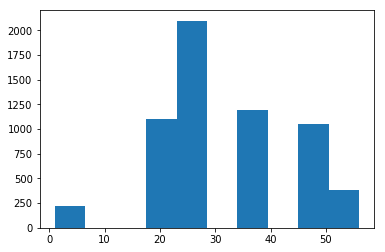

In [225]:
# without sns.set()
plt.hist(users["Age"],bins=10)

Text(0.5,1,'Distribution based on Age')

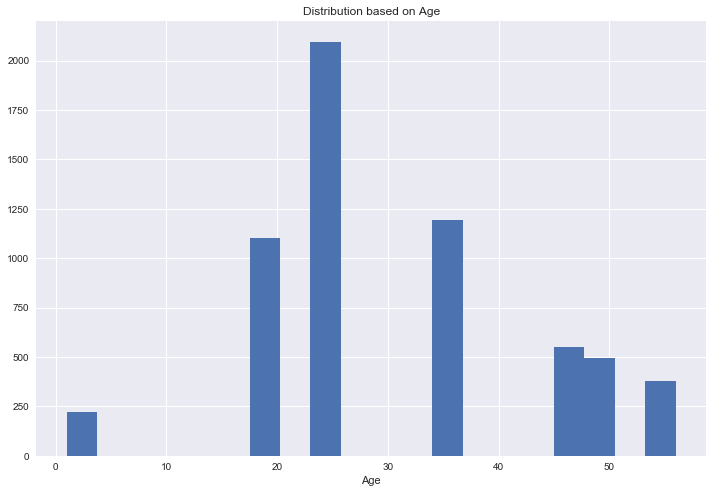

In [641]:
plt.hist(users["Age"],bins=20)
plt.xlabel("Age")
plt.title("Distribution based on Age")

In [646]:
users.groupby(["Gender"]).Age.count()
# Men are more interested in  movies than women

Gender
F    1709
M    4331
Name: Age, dtype: int64

In [649]:
users.groupby(["Gender","Occ"]).Age.count()

Gender  Occ                 
F       K-12 student             66
        academic/educator       209
        artist                   91
        clerical/admin          100
        college/grad student    234
        customer service         31
        doctor/health care      102
        executive/managerial    139
        farmer                    3
        homemaker                89
        lawyer                   22
        other                   232
        programmer               50
        retired                  34
        sales/marketing          79
        scientist                28
        self-employed            51
        technician/engineer      52
        tradesman/craftsman       4
        unemployed               15
        writer                   78
M       K-12 student            129
        academic/educator       319
        artist                  176
        clerical/admin           73
        college/grad student    525
        customer service         81

In [681]:
users.groupby(["Gender","Age","Occ"]).Gender.count().unstack()

Occ         K-12 student  academic/educator  artist  clerical/admin  \
Gender Age                                                            
F      1            63.0                1.0     2.0             NaN   
       18            3.0               18.0     9.0             9.0   
       25            NaN               69.0    31.0            38.0   
       35            NaN               41.0    19.0            26.0   
       45            NaN               37.0    15.0            10.0   
       50            NaN               27.0     9.0            10.0   
       56            NaN               16.0     6.0             7.0   
M      1           100.0                3.0     1.0             NaN   
       18           26.0               27.0    35.0             9.0   
       25            1.0               87.0    82.0            30.0   
       35            1.0               77.0    28.0            16.0   
       45            NaN               43.0    15.0             7.0   
       50            NaN               43.0     9.0             6.0   
       56            1.0               39.0     6.0             5.0   

Occ         college/grad student  customer service  doctor/health care  \
Gender Age                                                               
F      1                     NaN               NaN                 NaN   
       18                  163.0               5.0                 3.0   
       25                   59.0              12.0                32.0   
       35                    6.0               7.0                24.0   
       45                    2.0               5.0                19.0   
       50                    4.0               2.0                14.0   
       56                    NaN               NaN                10.0   
M      1                     3.0               NaN                 NaN   
       18                  371.0              13.0                 6.0   
       25                  141.0              40.0                44.0   
       35                    8.0              18.0                35.0   
       45                    1.0               5.0                12.0   
       50                    1.0               4.0                26.0   
       56                    NaN               1.0                11.0   

Occ         executive/managerial  farmer  homemaker   ...    other  \
Gender Age                                            ...            
F      1                     1.0     NaN        NaN   ...      9.0   
       18                    3.0     NaN        5.0   ...     32.0   
       25                   62.0     NaN       28.0   ...     92.0   
       35                   37.0     1.0       34.0   ...     43.0   
       45                   16.0     NaN       11.0   ...     25.0   
       50                   16.0     1.0        7.0   ...     18.0   
       56                    4.0     1.0        4.0   ...     13.0   
M      1                     1.0     1.0        NaN   ...     18.0   
       18                   14.0     1.0        1.0   ...     74.0   
       25                  191.0     6.0        1.0   ...    206.0   
       35                  177.0     2.0        1.0   ...     92.0   
       45                   58.0     1.0        NaN   ...     41.0   
       50                   64.0     1.0        NaN   ...     28.0   
       56                   35.0     2.0        NaN   ...     20.0   

Occ         programmer  retired  sales/marketing  scientist  self-employed  \
Gender Age                                                                   
F      1           NaN      NaN              NaN        NaN            NaN   
       18          3.0      NaN             15.0        1.0            2.0   
       25         17.0      NaN             36.0       15.0            9.0   
       35         15.0      NaN             17.0        3.0           15.0   
       45          9.0      2.0              4.0        7.0           10.0   
       50  

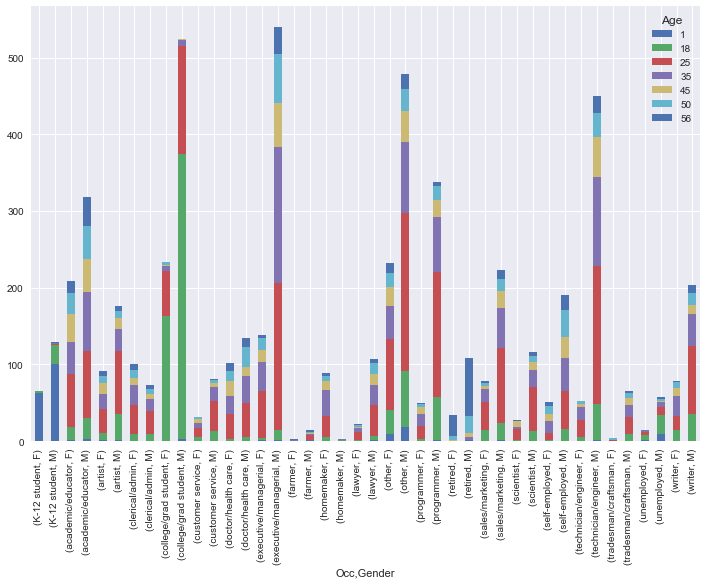

In [694]:
#plt.figure(figsize=(40,20))
users.groupby(["Occ","Gender","Age"]).Age.count().unstack().plot(kind='bar',stacked=True)

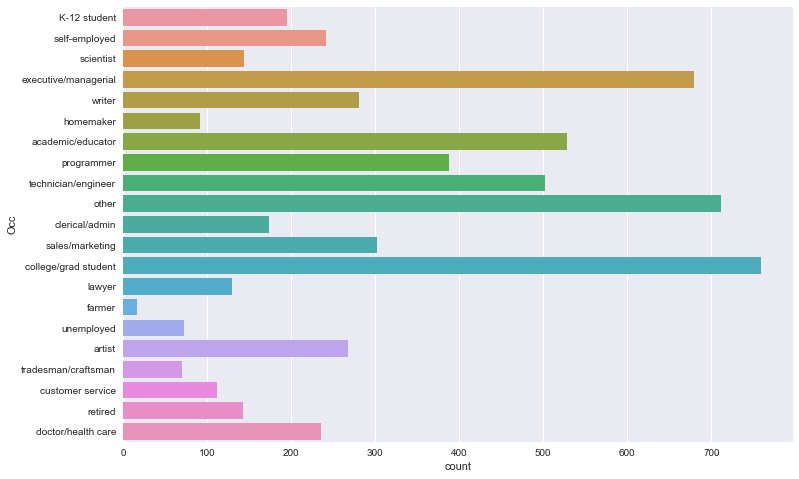

In [248]:
sns.countplot(y="Occ",data=users)

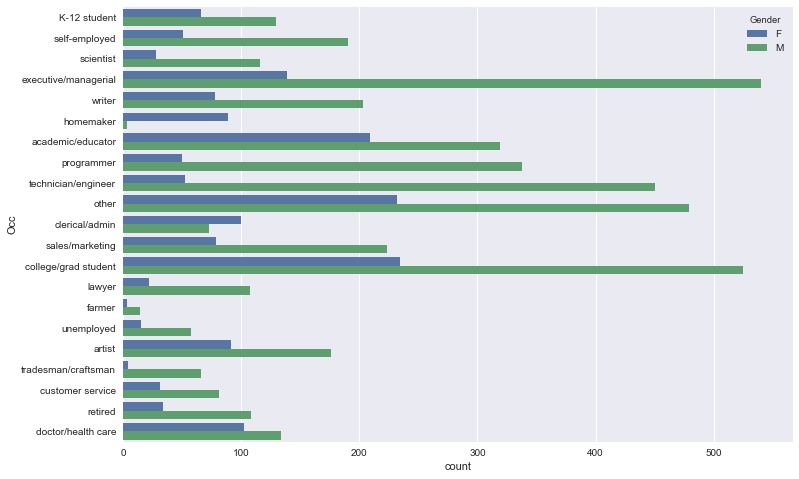

In [245]:
sns.countplot(y="Occ",hue="Gender",data=users)

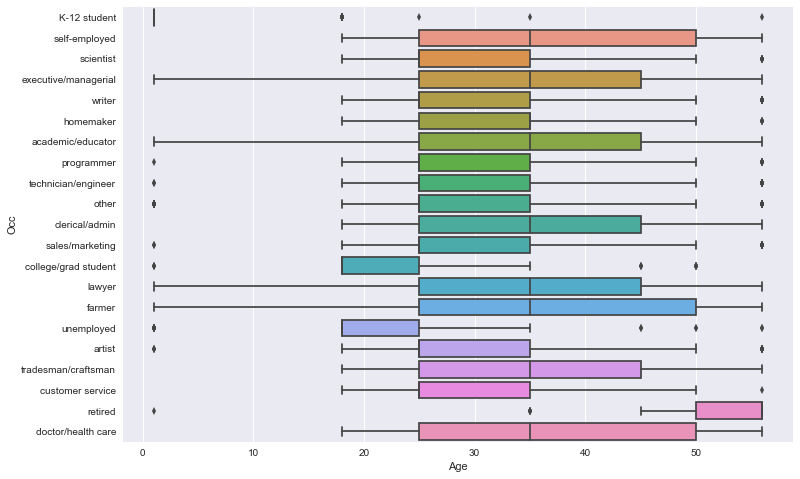

In [247]:
sns.boxplot(y="Occ",x="Age",data=users)

In [549]:
mv_dict=dict(zip(mvlens.MovieID,mvlens["Movie Name"]))

In [550]:
mv_dict

{1: 'Toy Story ',
 2: 'Jumanji ',
 3: 'Grumpier Old Men ',
 4: 'Waiting to Exhale ',
 5: 'Father of the Bride Part II ',
 6: 'Heat ',
 7: 'Sabrina ',
 8: 'Tom and Huck ',
 9: 'Sudden Death ',
 10: 'GoldenEye ',
 11: 'American President, The ',
 12: 'Dracula: Dead and Loving It ',
 13: 'Balto ',
 14: 'Nixon ',
 15: 'Cutthroat Island ',
 16: 'Casino ',
 17: 'Sense and Sensibility ',
 18: 'Four Rooms ',
 19: 'Ace Ventura: When Nature Calls ',
 20: 'Money Train ',
 21: 'Get Shorty ',
 22: 'Copycat ',
 23: 'Assassins ',
 24: 'Powder ',
 25: 'Leaving Las Vegas ',
 26: 'Othello ',
 27: 'Now and Then ',
 28: 'Persuasion ',
 29: 'City of Lost Children, The ',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) ',
 31: 'Dangerous Minds ',
 32: 'Twelve Monkeys ',
 33: 'Wings of Courage ',
 34: 'Babe ',
 35: 'Carrington ',
 36: 'Dead Man Walking ',
 37: 'Across the Sea of Time ',
 38: 'It Takes Two ',
 39: 'Clueless ',
 40: 'Cry, the Beloved Country ',
 41: 'Richard III ',
 42: 'Dead Presidents ',

In [551]:
ratings["Mov"]=ratings.MovieID.map(mv_dict)

In [553]:
ratings.head(25)

,UserID,MovieID,Rating,Timestamp,Mov
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest
1,1,661,3,978302109,James and the Giant Peach
2,1,914,3,978301968,My Fair Lady
3,1,3408,4,978300275,Erin Brockovich
4,1,2355,5,978824291,"Bug's Life, A"
5,1,1197,3,978302268,"Princess Bride, The"
6,1,1287,5,978302039,Ben-Hur
7,1,2804,5,978300719,"Christmas Story, A"
8,1,594,4,978302268,Snow White and the Seven Dwarfs
9,1,919,4,978301368,"Wizard of Oz, The"


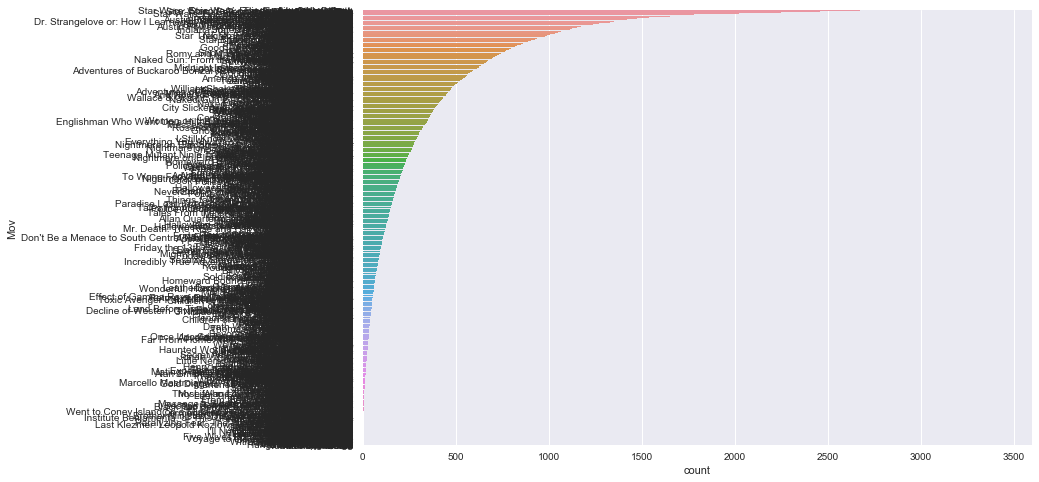

In [275]:
sns.countplot(y="Mov",data=ratings,order=ratings["Mov"].value_counts().index)

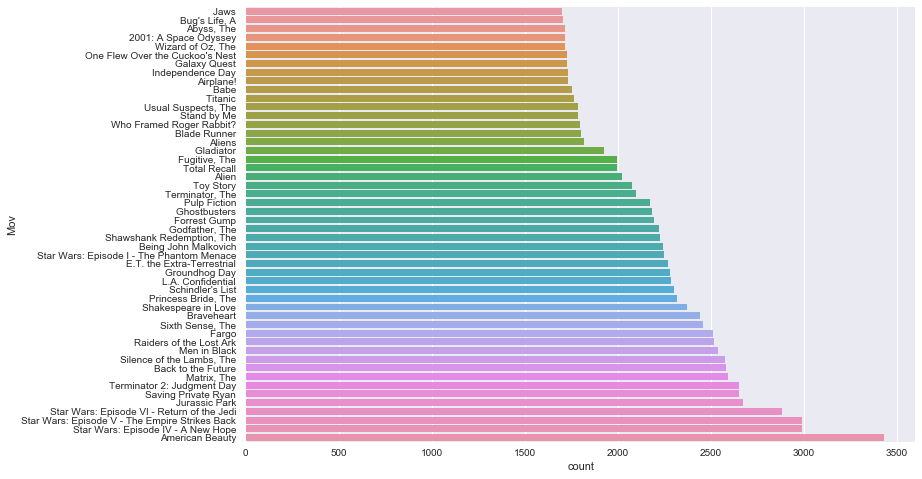

In [294]:
sns.countplot(y="Mov",data=ratings,order=reversed(ratings["Mov"].value_counts().index[:50]))
#plt.yticks(rotation=10)

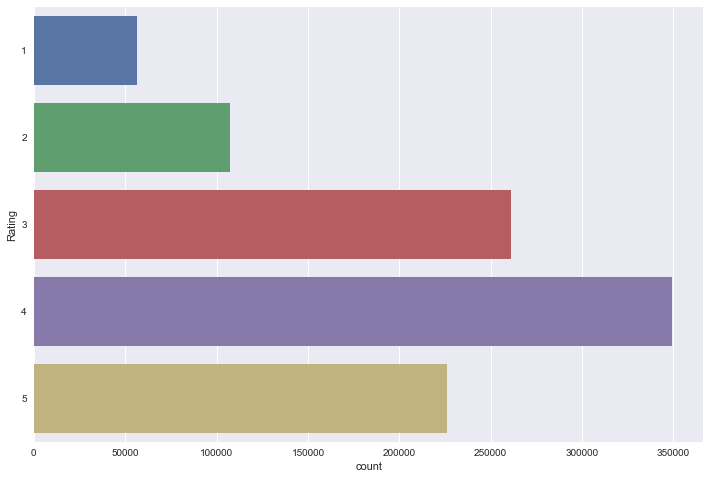

In [301]:
sns.countplot(y="Rating",data=ratings)

In [554]:
ratings.Mov[ratings["Rating"]==4]

3                                   Erin Brockovich 
8                   Snow White and the Seven Dwarfs 
9                                 Wizard of Oz, The 
11                                             Gigi 
12                           Miracle on 34th Street 
13                         Ferris Bueller's Day Off 
15                                        Airplane! 
17                                            Bambi 
19                                              Big 
26                       E.T. the Extra-Terrestrial 
27                                          Titanic 
28                                          Ponette 
30                                             Antz 
31                                Girl, Interrupted 
32                                         Hercules 
33                                          Aladdin 
34                                            Mulan 
35                     Hunchback of Notre Dame, The 
38                                 Sixth Sense

In [562]:
ratings["Mov_Year"]=ratings.MovieID.map(dict(zip(mvlens.MovieID,mvlens.Year)))

In [563]:
ratings.head(10)

,UserID,MovieID,Rating,Timestamp,Mov,Mov_Year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,1975
1,1,661,3,978302109,James and the Giant Peach,1996
2,1,914,3,978301968,My Fair Lady,1964
3,1,3408,4,978300275,Erin Brockovich,2000
4,1,2355,5,978824291,"Bug's Life, A",1998
5,1,1197,3,978302268,"Princess Bride, The",1987
6,1,1287,5,978302039,Ben-Hur,1959
7,1,2804,5,978300719,"Christmas Story, A",1983
8,1,594,4,978302268,Snow White and the Seven Dwarfs,1937
9,1,919,4,978301368,"Wizard of Oz, The",1939


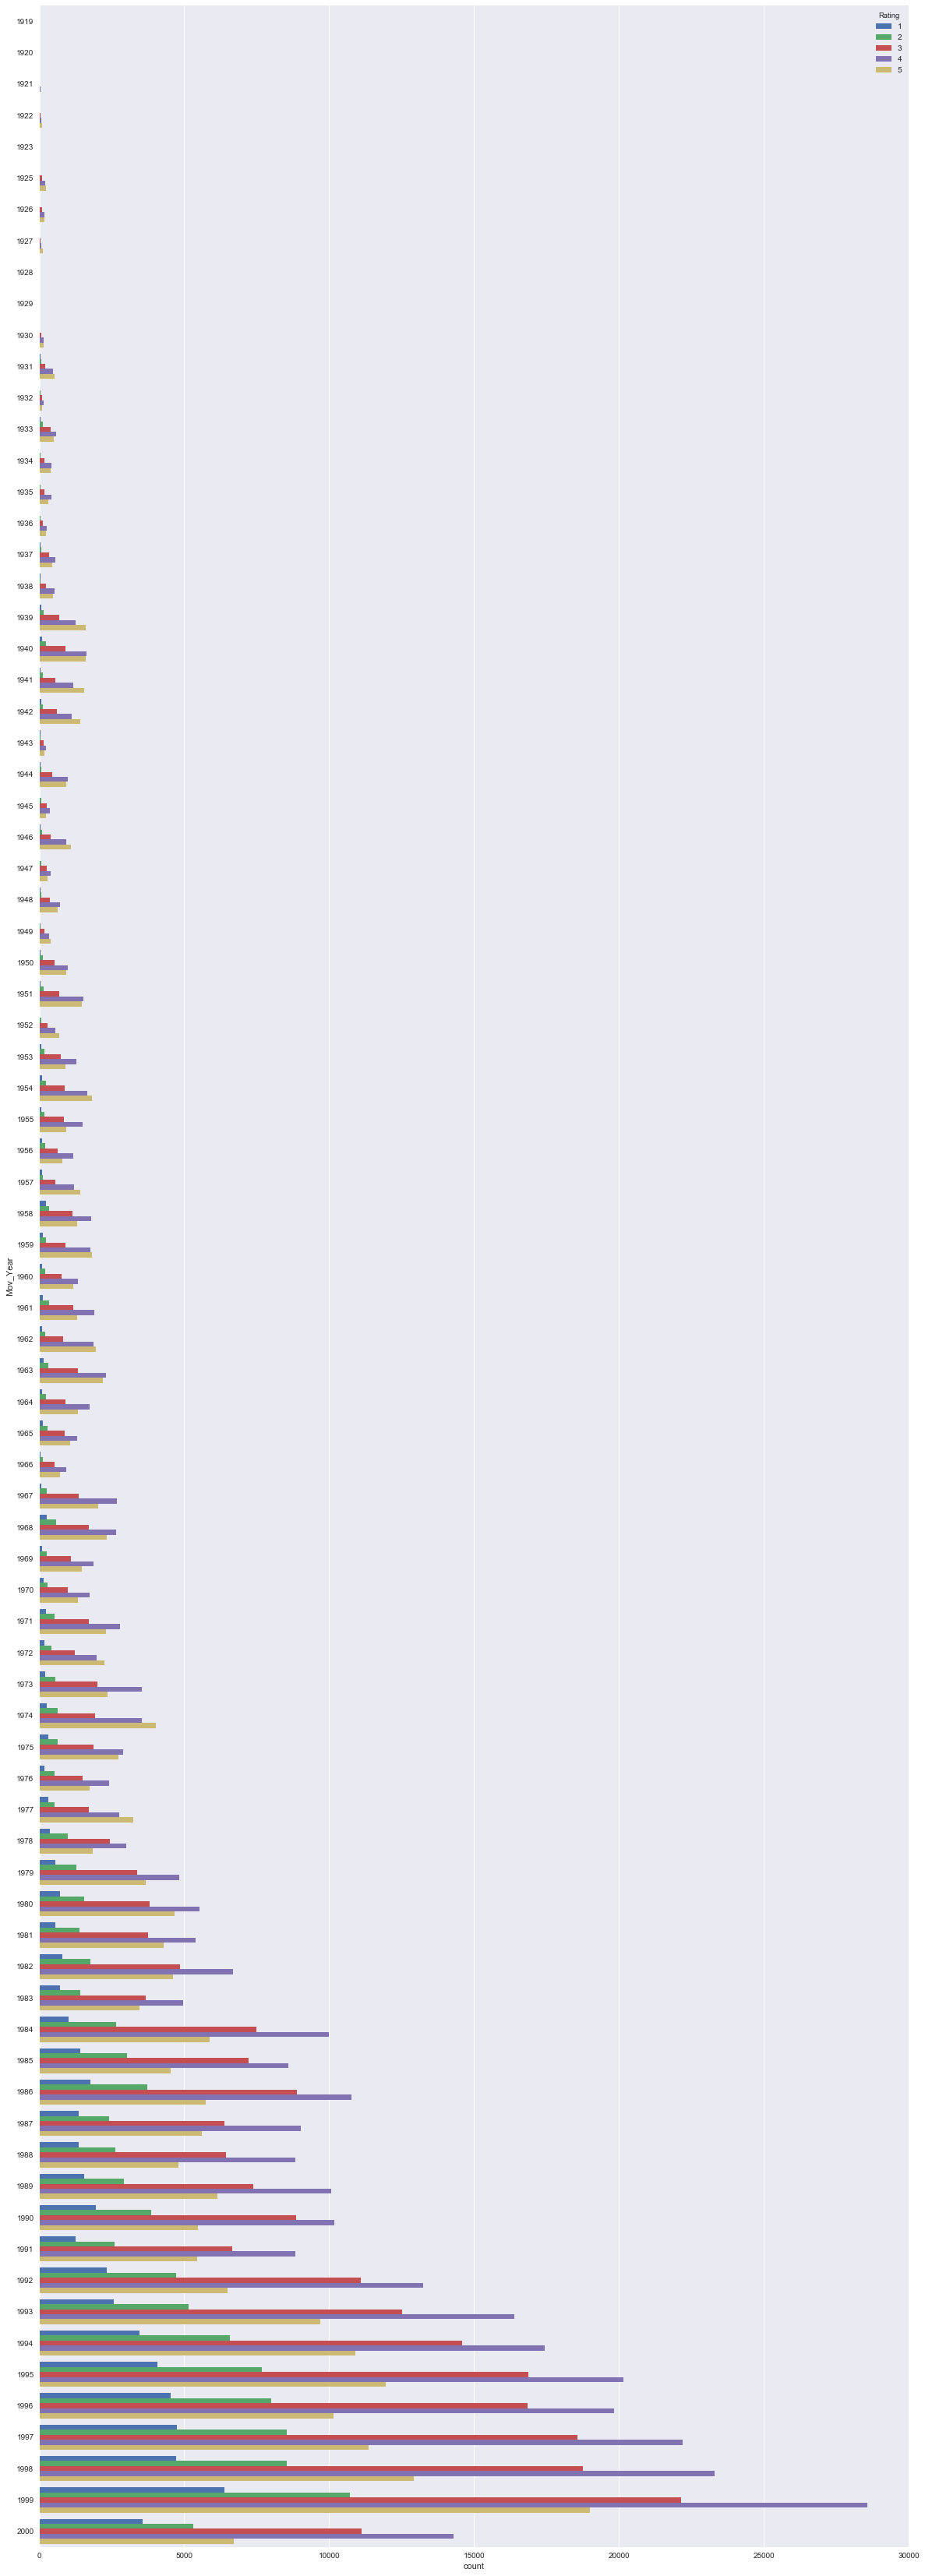

In [591]:
plt.figure(figsize=(20,60))
sns.countplot(y="Mov_Year",hue="Rating",data=ratings,saturation=1,palette="deep")

In [605]:
# Let's explore the genres
gen=[]
for x in range(len(mvlens.Genre)):
    for y in range(len(mvlens.Genre.str.split('|')[x])):
        gen.append(mvlens.Genre.str.split('|')[x][y])
        
gen=set(gen)

In [603]:
mvlens[mvlens['Name'].str.find('1919')!=-1]
mvlens.Name.iloc[2754]

'Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)'

In [606]:
gen

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [618]:
ratings.join(mvlens.Genre,on="MovieID")

,UserID,MovieID,Rating,Timestamp,Mov,Mov_Year,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest,1975,Comedy|Drama|Romance
1,1,661,3,978302109,James and the Giant Peach,1996,Action
2,1,914,3,978301968,My Fair Lady,1964,Drama
3,1,3408,4,978300275,Erin Brockovich,2000,Comedy|Drama
4,1,2355,5,978824291,"Bug's Life, A",1998,Comedy|Romance
5,1,1197,3,978302268,"Princess Bride, The",1987,Action|Adventure|Comedy|Horror|Sci-Fi
6,1,1287,5,978302039,Ben-Hur,1959,Comedy|Romance
7,1,2804,5,978300719,"Christmas Story, A",1983,Drama|Mystery|Romance
8,1,594,4,978302268,Snow White and the Seven Dwarfs,1937,Comedy
9,1,919,4,978301368,"Wizard of Oz, The",1939,Mystery|Romance|Thriller


In [628]:
#sns.countplot(x='Rating',hue='Genre',data=ratings.join(mvlens.Genre,on="MovieID"))
#ratings.head()
temp=ratings.join(mvlens.Genre,on="MovieID")

Text(0.5,0,'Documentary-Rating')

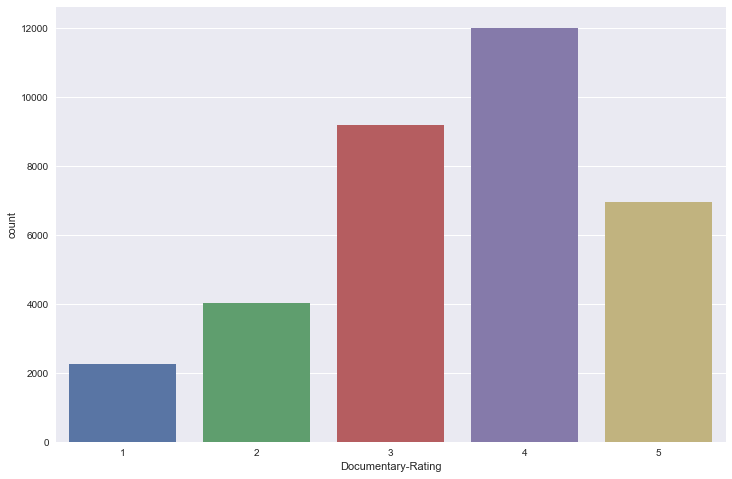

In [640]:
st="Documentary"
sns.countplot(x="Rating",data=temp[temp.Genre.str.find(st)!=-1])
plt.xlabel(st+"-Rating")